In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
results_df = pd.read_csv('results/results.csv').drop(['id'], axis=1)

In [149]:
list(results_df['name'].unique())

['BASELINE_34', 'REFT_VACCINE_34', 'BASELINE_77_TRIS', 'REFT_VACCINE_77_TRIS']

In [150]:
# List of names to include
names_to_include = ['BASELINE_34', 'REFT_VACCINE_34', 'BASELINE_77_TRIS', 'REFT_VACCINE_77_TRIS']  # Example names

# Filter the DataFrame
filtered_results_df = results_df[results_df['name'].isin(names_to_include)]

alpha_dict = {'ITI-Vaccine': 0.5,
              'NO-Vaccine': 1}

title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 12}

In [151]:
# retrocompat:

init_performance = 0.1339752606450866
init_toxicity = 0.28


def abs_to_rel_performance(abs_perf):

    return abs_perf / init_performance


def abs_to_rel_toxicity(abs_toxicity):

    return abs_toxicity / init_toxicity


cond = results_df['name'].str.contains('77')
results_df.loc[cond, 'performance'] = results_df.loc[cond, 'performance'].apply(abs_to_rel_performance)
results_df.loc[cond, 'toxicity'] = results_df.loc[cond, 'toxicity'].apply(abs_to_rel_toxicity)

# Performance

In [153]:
cond = results_df['name'].str.contains('VACCINE')
iti_vacc_performance = results_df.loc[cond].groupby('layer')['performance'].describe()
iti_vacc_performance.reset_index(inplace=True)
iti_vacc_performance_df = iti_vacc_performance[['layer', 'count','mean']].copy()
iti_vacc_performance_df['name'] = 'ITI-Vaccine'

In [154]:
cond = results_df['name'].str.contains('BASELINE')
baseline_performance = results_df.loc[cond].groupby('layer')['performance'].describe()
baseline_performance.reset_index(inplace=True)
baseline_performance_df = baseline_performance[['layer','count', 'mean']].copy()
baseline_performance_df['name'] = 'NO-Vaccine'

In [155]:
perf_results_df = pd.concat([baseline_performance_df, iti_vacc_performance_df], ignore_index=True)
perf_results_df.columns = ['layer', 'count', 'mean_performance', 'name']

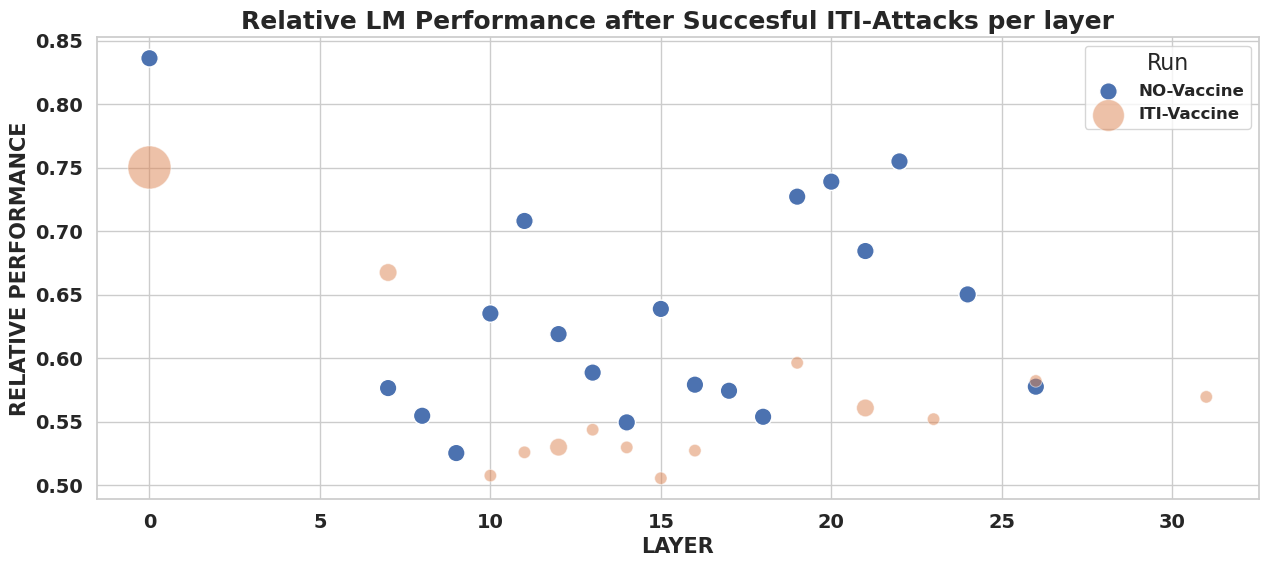

In [161]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(15, 6))

for name in perf_results_df['name'].unique():
    subset = perf_results_df[perf_results_df['name'] == name]
    sns.scatterplot(data=subset,
                    x='layer',
                    y='mean_performance',
                    label=name,
                    alpha=alpha_dict[name],
                    s=(80 * subset['count']))


# Add title and labels
plt.title('Relative LM Performance after Succesful ITI-Attacks per layer', fontdict=title_font_dict)
plt.xlabel('LAYER', fontdict=axis_font_dict)
plt.ylabel('RELATIVE PERFORMANCE', fontdict=axis_font_dict)

# Customize ticks
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Show the plot
plt.legend(title='Run', title_fontsize='16', prop=legend_font_dict)
plt.show()


# Toxicity:

In [157]:
cond = results_df['name'].str.contains('VACCINE')
iti_vacc_toxicity = results_df.loc[cond].groupby('layer')['toxicity'].describe()
iti_vacc_toxicity.reset_index(inplace=True)
iti_vacc_toxicity_df = iti_vacc_toxicity[['layer', 'count', 'mean']].copy()
iti_vacc_toxicity_df['name'] = 'ITI-Vaccine'

In [158]:
cond = results_df['name'].str.contains('BASELINE')
baseline_toxicity = results_df.loc[cond].groupby('layer')['toxicity'].describe()
baseline_toxicity.reset_index(inplace=True)
baseline_toxicity_df = baseline_toxicity[['layer', 'count', 'mean']].copy()
baseline_toxicity_df['name'] = 'NO-Vaccine'

In [159]:
toxicity_results_df = pd.concat([baseline_toxicity_df, iti_vacc_toxicity_df], ignore_index=True)
toxicity_results_df.columns = ['layer', 'count', 'mean_toxicity', 'name']

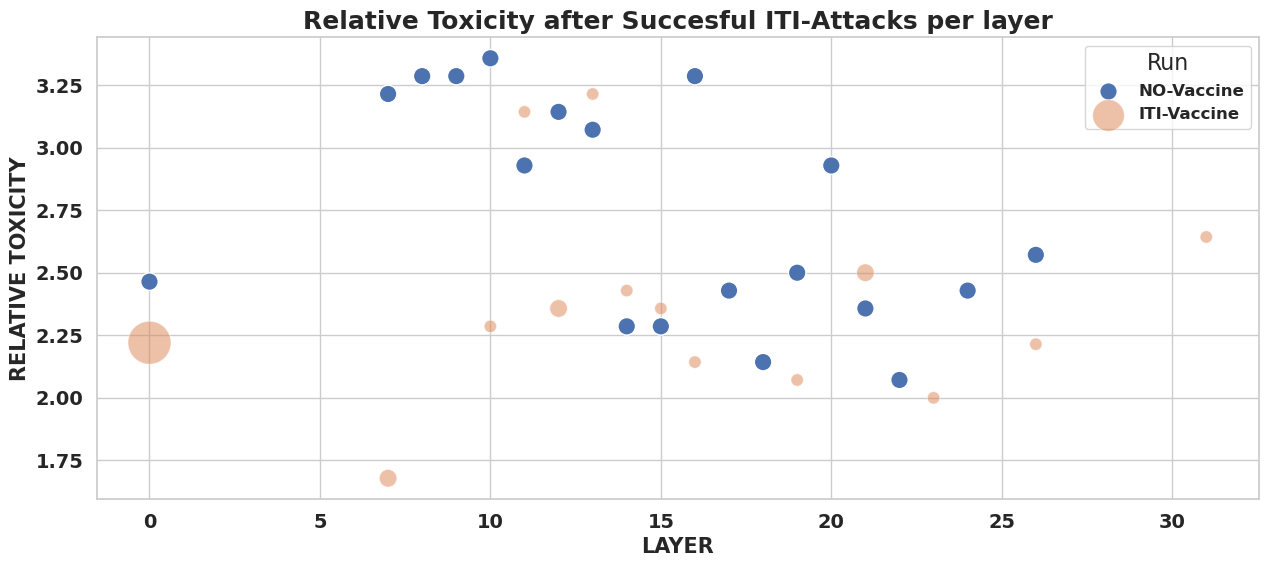

In [162]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(15, 6))

for name in toxicity_results_df['name'].unique():
    subset = toxicity_results_df[toxicity_results_df['name'] == name]
    sns.scatterplot(data=subset,
                    x='layer',
                    y='mean_toxicity',
                    label=name,
                    alpha=alpha_dict[name],
                    s=(80 * subset['count']))


# Add title and labels
plt.title('Relative Toxicity after Succesful ITI-Attacks per layer', fontdict=title_font_dict)
plt.xlabel('LAYER', fontdict=axis_font_dict)
plt.ylabel('RELATIVE TOXICITY', fontdict=axis_font_dict)

# Customize ticks
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Show the plot
plt.legend(title='Run', title_fontsize='16', prop=legend_font_dict)
plt.show()
